# Introducción a DataFrames con pandas
## Importación y visualización
Un dataframe (en adelante df), es una estructura tabular con filas y columnas, donde la etiqueta de las filas suele llamarse index, y la de las columnas como las variables.
Los index permiten búsquedas rápidas y hacer cruces. Se ahondará más en el capítulo de relaciones entre dfs.

Por ejemplo, un df puede ser el siguiente conjunto de datos de las acciones de Apple, donde la fecha actúa como index.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('population.txt')

### Métodos y atributos importantes
Existen varios métodos y atributos importantes que conocer para estudiar rápidamente nuestro set de datos.
La diferencia entre ambos tipos, es que los métodos pueden ser entendidos como una función, mientras que los atributos son información contenida en el objeto dataframe (comprobar esto)

Los más relevantes son:

Métodos
- head
- info
- describe

Atributos
- index
- columns
- shape

In [3]:
# Head, muestra las primeras líneas. Por defecto son las primeras 5. Esto puede hacerse para variables aisladas también
print(df.head(5))

print('Códigos de país, extraídos de forma distinta')
print(df.CountryCode.head(3))
print(df['CountryCode'].head(3))

# Info: Permite ver el tipo de objeto, de columnas, uso de memoria, index, y cantidad de valores no nulos (información a tener en cuenta siempre)
print(df.info())

# Describe: estadísticos más importantes de cada columna
print(df.describe())

# Index: muestra como están ingresados los datos. en este caso no se ha especificado, asi que se imprime solo el rango
print(df.index)

# Columns: nombres de las columnas del objeto en análisis
print(df.columns)

# Shape: Dimensión del objeto
print(df.shape)

                               CountryName CountryCode  Year  \
0                               Arab World         ARB  1960   
1                   Caribbean small states         CSS  1960   
2           Central Europe and the Baltics         CEB  1960   
3  East Asia & Pacific (all income levels)         EAS  1960   
4    East Asia & Pacific (developing only)         EAP  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8.964930e+08                      16.917679  
Códigos de país, extraídos de forma distinta
0    ARB
1    CSS
2    CEB
Name: CountryCode, dtype: object
0    ARB
1    CSS
2    CEB
Name: CountryCode, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13374 entries, 0 to 13373
Data columns (total 5 columns):
CountryName             

Es posible acceder a ciertas partes del dataframe tanto seleccionando ciertas filas, como ciertas columnas. Por ejemplo, para tomar las primeras 5 filas, o las últimas, se puede utilizar la funcion iloc, junto con un índice y signos. 

df.iloc[indices_filas, indices_columnas]

Para seleccionar todas las filas o todas las columnas, es posible poner en su lugar un ':', que simboliza 'tomar desde el inicio al final'.

Por ejemplo

In [4]:
# Es posible especificar desde el inicio tanto no poniendo nada, como poniendo un 0.

print(df.iloc[:5,:])
print(df.iloc[0:5,:])

# Para ver solo las últimas 5, es posible utilizar
print(df.iloc[-5:,:])

                               CountryName CountryCode  Year  \
0                               Arab World         ARB  1960   
1                   Caribbean small states         CSS  1960   
2           Central Europe and the Baltics         CEB  1960   
3  East Asia & Pacific (all income levels)         EAS  1960   
4    East Asia & Pacific (developing only)         EAP  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8.964930e+08                      16.917679  
                               CountryName CountryCode  Year  \
0                               Arab World         ARB  1960   
1                   Caribbean small states         CSS  1960   
2           Central Europe and the Baltics         CEB  1960   
3  East Asia & Pacific (all income levels

Las columnas de un dataframe se llaman Series. Estas también poseen atributos, y son considerados arreglos numpy de 1 dimensión. Mientras que un dataframe es un arreglo de dos dimensiones cuyas columnas son Series.

In [5]:
# Se selecciona la serie de población urbana
pop = df['Urban population (% of total)']

# Como pop s una serie, no posee el método info, que es de los dataframes, por lo que para ver que es serie se debe usar 'type'
print('Tipo de objeto de pop: ' + str(type(pop)))
print(pop.head())

Tipo de objeto de pop: <class 'pandas.core.series.Series'>
0    31.285384
1    31.597490
2    44.507921
3    22.471132
4    16.917679
Name: Urban population (% of total), dtype: float64


### Pandas y Numpy
Panda depende e interactúa con numpy, la librería para manipular rápidamente los arreglos numéricos.
Esto resulta muy util al considerar el atributo .values para representar un DataFrame como arreglo NumPy.
Por lo general, manipulando datos será necesario interactuar con arreglos NumPy, series de pandas y Dataframes de pandas, por lo que es necesario entender los numerosos métodos para generar los cálculos.

Por ejemplo, teniendo un dataframe pequeño, es posible convertirlo a un arreglo numpy y utilizar funciones en él, obteniéndose los mismo resultados, pero en distintos objetos y diferentes tiempos de ejecución.

In [6]:
data = {'Total Population':[3.034971e+09, 3.684823e+09, 4.436590e+09, 5.282716e+09, 6.115974e+09]}
df = pd.DataFrame(data, index =[1960, 1970, 1980, 1990, 2000]) 
print(df)

      Total Population
1960      3.034971e+09
1970      3.684823e+09
1980      4.436590e+09
1990      5.282716e+09
2000      6.115974e+09


In [7]:
# Create array of DataFrame values: np_vals
np_vals = df.values

# Create new array of base 10 logarithm values: np_vals_log10
np_vals_log10 = np.log10(np_vals)

# Create array of new DataFrame by passing df to np.log10(): df_log10
df_log10 = np.log10(df)

# Print original and new data containers
[print(x, 'has type', type(eval(x))) for x in ['np_vals', 'np_vals_log10', 'df', 'df_log10']]

np_vals has type <class 'numpy.ndarray'>
np_vals_log10 has type <class 'numpy.ndarray'>
df has type <class 'pandas.core.frame.DataFrame'>
df_log10 has type <class 'pandas.core.frame.DataFrame'>


[None, None, None, None]

## Creación de dataframes
Ya se han creado o importado dataframes de algunas formas en secciones anteriores. Pero acá se ahondará el proceso en mayor profundidad. La forma más utilizada es mediante la importación de algún archivo que contenga la data, como se hizo al principio con la función pd.read_csv, donde se hace referencia a un archivo en alguna dirección.

### Creación Directa
Otra forma es la creación de un diccionario, para lo cual existen varias formas, siendo las más utilizadas la definición directa  por diccionario, y construcción por partes de las listas.
En el segundo caso resulta útil la función zip, la cual recibe dos listas y las liga en un objeto zip, el cual es necesario pasar a lista, y luego a un diccionario.

Se recomienda repasar las secciones de Estructuras de datos para recordar detalles de los diccionarios y las listas.

In [8]:
# Se define el diccionario
data = {'dia': ['lun', 'mar', 'mier'],
        'ciudad': ['quilpué', 'viña del mar', 'chimbarongo'],
        'visitantes': [2, 5000, 390],
        'firmas': [1, 400, 43]}

# Se transforma el diccionario en un Dataframe
df = pd.DataFrame(data)

# Mostrar
print(df)

         ciudad   dia  firmas  visitantes
0       quilpué   lun       1           2
1  viña del mar   mar     400        5000
2   chimbarongo  mier      43         390


In [9]:
# Definiendo las columnas como listas
ciudad = ['quilpué', 'viña del mar', 'chimbarongo']
firmas = [1, 400, 43]
visitantes = [2, 5000, 390]
dia = ['lun', 'mar', 'mier']   

# Definir los nombres y datos para generar el diccionario. 
lista_labels = ['ciudad', 'firmas', 'visitantes', 'dia']
lista_cols = [ciudad, firmas, visitantes, dia]

# Usar función zip para ligar la data y construir una lista de tuplas
zipped = list(zip(lista_labels, lista_cols))

# Mostar el zip
print(zipped)

# Mostrar el tipo. Es una lista, pero necesitamos un diccionario
type(zipped)

[('ciudad', ['quilpué', 'viña del mar', 'chimbarongo']), ('firmas', [1, 400, 43]), ('visitantes', [2, 5000, 390]), ('dia', ['lun', 'mar', 'mier'])]


list

In [10]:
# Para generar el diccionario basta con usar dict, y esto pasarlo a la función utilizada anteriormente
data = dict(zipped)
df = pd.DataFrame(data)

print(df.head())


# No es posible pasar de lista a dataframe, funciona, pero no de la forma que estamos buscando
df_fail = pd.DataFrame(zipped)
print(df_fail.head())

         ciudad   dia  firmas  visitantes
0       quilpué   lun       1           2
1  viña del mar   mar     400        5000
2   chimbarongo  mier      43         390
            0                                     1
0      ciudad  [quilpué, viña del mar, chimbarongo]
1      firmas                          [1, 400, 43]
2  visitantes                        [2, 5000, 390]
3         dia                      [lun, mar, mier]


#### Broadcasting
Una herramienta importante es broadcasting, la cual permite generar rápidamente columnas, asignándoles un valor por defecto. Esto puede usarse tanto al crear el Data Frame, como al tratar de modificarlo.
En el siguiente ejemplo se muestran ambos casos

In [11]:
# Broadcasting en modificación
df['ciudad_chilena'] = "Si"

# Mostrar
print(df)

# Broadcasting en creacion
# Se define el diccionario, pero se agregar una variable del diccionario que solo tiene un campo. Este será repetido
data = {'dia': ['lun', 'mar', 'mier'],
        'ciudad': ['quilpué', 'viña del mar', 'chimbarongo'],
        'visitantes': [2, 5000, 390],
        'firmas': [1, 400, 43],
       'ciudad_chilena' : 'Si'}

# Se transforma el diccionario en un Dataframe
df = pd.DataFrame(data)

# Mostrar
print(df)

# Recordar que también es posible cambiar el nombre de las columnas accediendo al atributo y entregándole una lista
df.columns = ['Dia', 'Ciudad', 'Visitantes', 'Firmas', 'Ciudad_Chilena']
print(df)

         ciudad   dia  firmas  visitantes ciudad_chilena
0       quilpué   lun       1           2             Si
1  viña del mar   mar     400        5000             Si
2   chimbarongo  mier      43         390             Si
         ciudad ciudad_chilena   dia  firmas  visitantes
0       quilpué             Si   lun       1           2
1  viña del mar             Si   mar     400        5000
2   chimbarongo             Si  mier      43         390
            Dia Ciudad Visitantes  Firmas  Ciudad_Chilena
0       quilpué     Si        lun       1               2
1  viña del mar     Si        mar     400            5000
2   chimbarongo     Si       mier      43             390


### Importación y exportación
Si bien ya se han utilizado funciones de importación como pd.read_csv, existen varios parámetros en la función que resultan de utilidad

+ header: que especifica si el archivo a importar viene con nombres que queremos utilizar, y dónde esta este header.
Si se pone un 0, significa que no se quiere leer el header, y que se debe especificar el nombre de las columnas. Un 3, sice que se debe ignorar la información que existe hasta la fila 3. Un None, significa que el dataset no viene con un header.
+ names: los nombres  de las columnas en caso de que no queramos utilizar las que vienen en el archivo o simplemente no existan
+ na_values: que denominación tienen los valores perdidos. En algunos casos no vienen con nada, en otros vienen con 0s o -1s
+ delimiter: algunos archivos separan las columnas con algún caracter, siendo los más usados [';', ',', '|']
+ parse_dates: permite tomar una lista de las columnas que representan una fecha en específico, a menudo dadas por el formado AA:MM:DD:HH:MM:SS

Además, existen las funciones para escribir en archivos, siendo las más populares *.to_csv() y *.to_excel()

+ index: si agregar o no una columna al excel


Los siguientes ejemplos son de manchas solares y presentan varias cosas que arreglar.

In [12]:
# Se define el nombre
filepath = 'SILSO.csv'

# Leer el archivo
manchas = pd.read_csv(filepath)

# Revisar los tipos, y ver un poco del dataframe
manchas.info()

print(manchas.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72103 entries, 0 to 72102
Data columns (total 6 columns):
1818        72103 non-null int64
01          72103 non-null int64
01.1        72103 non-null int64
1818.004    72103 non-null float64
 -1         72103 non-null int64
1           72103 non-null int64
dtypes: float64(1), int64(5)
memory usage: 3.3 MB
   1818  01  01.1  1818.004   -1  1
0  1818   1     2  1818.007   -1  1
1  1818   1     3  1818.010   -1  1
2  1818   1     4  1818.012   -1  1
3  1818   1     5  1818.015   -1  1
4  1818   1     6  1818.018   -1  1


Como se puede observar, las columnas no tienen nombre, y existen -1 extraños. Solo con el DataFrame no hay forma de saber que cosa corresponde a que. Nosotros sabemos que las columnas 0 a 2 corresponden al año, mes y día respectivamente, la fecha como fracción del año (lo cual es batante poco intuitivo), el número de manchas solares por día, y un indicador. además sabemos que los -1s corresponden a datos perdidos.

Lo del header se puede arreglar fijando el parámetro a None, y entregando un nombre al leer el archivo. Además, es posible indicar como están denominados los valores perdidos. Esto último puede hacerse de forma distinta para cada columna.

In [13]:
nombres = ['año', 'mes', 'día', 'fecha', 'manchas', 'indicador']

# Leyendo el archivo con los parámetros, y especificando la columna en la que el -1 representa un NaN
manchas = pd.read_csv(filepath, header = None, names = nombres, na_values={'manchas':['-1']})

print(manchas.iloc[10:19,:])

# Al hacer lo anterior, los -1 en manchas no desaparecen. Pero al inspeccionar el valor en el archivo original, 
# se encuentra que los 1s tenían un espacion antes de ellos, arreglandolo queda...
manchas = pd.read_csv(filepath, header = None, names = nombres, na_values={'manchas':[' -1']})

print(manchas.iloc[10:19,:])

     año  mes  día     fecha  manchas  indicador
10  1818    1   11  1818.031       -1          1
11  1818    1   12  1818.034       -1          1
12  1818    1   13  1818.037       22          1
13  1818    1   14  1818.040       -1          1
14  1818    1   15  1818.042       -1          1
15  1818    1   16  1818.045       -1          1
16  1818    1   17  1818.048       46          1
17  1818    1   18  1818.051       59          1
18  1818    1   19  1818.053       63          1
     año  mes  día     fecha  manchas  indicador
10  1818    1   11  1818.031      NaN          1
11  1818    1   12  1818.034      NaN          1
12  1818    1   13  1818.037     22.0          1
13  1818    1   14  1818.040      NaN          1
14  1818    1   15  1818.042      NaN          1
15  1818    1   16  1818.045      NaN          1
16  1818    1   17  1818.048     46.0          1
17  1818    1   18  1818.051     59.0          1
18  1818    1   19  1818.053     63.0          1


Otra cosa que se puede hacer, es cargar la fecha de mejor forma. Las primeras 3 columnas representan el formato clásico de año, año|mes|día, que no es necesario mantener separado. Esto entrega un dataframe mucho más ordenado, que se puede leer aún mejor 

In [14]:
# Leer el archivo dejando la fecha solo en una columna
# Como se aprecia, primero considera los nombres que se asignaron al dataframe
manchas = pd.read_csv(filepath, 
                      header = None, 
                      names = nombres, 
                      na_values={'manchas':[' -1']},
                      parse_dates = [[0, 1, 2]])

print(manchas.iloc[10:19,:])

# Las fechas son ideales para hacer índices, lo que se puede asignar con
manchas.index = manchas['año_mes_día']

# Nombrar el index
manchas.index.name = 'aa_mm_dd'

# Mostrar info
manchas.info()

# Seleccionando solo las columnas útiles
cols = ['manchas', 'indicador']
manchas = manchas[cols] 

print(manchas.iloc[10:19,:])

   año_mes_día     fecha  manchas  indicador
10  1818-01-11  1818.031      NaN          1
11  1818-01-12  1818.034      NaN          1
12  1818-01-13  1818.037     22.0          1
13  1818-01-14  1818.040      NaN          1
14  1818-01-15  1818.042      NaN          1
15  1818-01-16  1818.045      NaN          1
16  1818-01-17  1818.048     46.0          1
17  1818-01-18  1818.051     59.0          1
18  1818-01-19  1818.053     63.0          1
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72104 entries, 1818-01-01 to 2015-05-31
Data columns (total 4 columns):
año_mes_día    72104 non-null datetime64[ns]
fecha          72104 non-null float64
manchas        68857 non-null float64
indicador      72104 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 2.8 MB
            manchas  indicador
aa_mm_dd                      
1818-01-11      NaN          1
1818-01-12      NaN          1
1818-01-13     22.0          1
1818-01-14      NaN          1
1818-01-15   

## Introducción a los gráficos de pandas
Si bien pandas no es la mejor herramienta disponible en Python para visualización, si provee una interfaz simple para generar gráficos rápidos y estéticos. en este caso se ejemplificará

+ Gráficos de una variable
+ Gráficos de múltiples variables
+ Transformaciones de ejes
+ Subplots
+ Títulos y leyendas
+ Guardar gráficos

En este apartado se estudiarán el tiempo de una ciudad gringa y las acciones de Apple (nemotécnico: AAPL). 

### Temperatura
El primer ejemplo es bastante simple, solo plotear las temperaturas.

In [15]:
import matplotlib.pyplot as plt

# Cargar la data
df = pd.read_csv('austin_weather.csv')

print(df.head())

         Date  TempHighF  TempAvgF  TempLowF DewPointHighF DewPointAvgF  \
0  2013-12-21         74        60        45            67           49   
1  2013-12-22         56        48        39            43           36   
2  2013-12-23         58        45        32            31           27   
3  2013-12-24         61        46        31            36           28   
4  2013-12-25         58        50        41            44           40   

  DewPointLowF HumidityHighPercent HumidityAvgPercent HumidityLowPercent  \
0           43                  93                 75                 57   
1           28                  93                 68                 43   
2           23                  76                 52                 27   
3           21                  89                 56                 22   
4           36                  86                 71                 56   

          ...          SeaLevelPressureAvgInches SeaLevelPressureLowInches  \
0         ... 

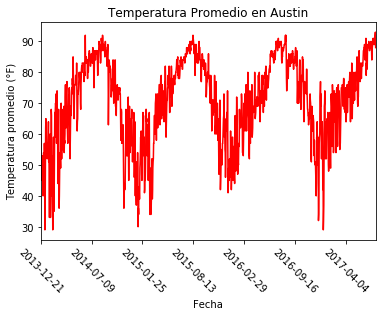

In [4]:
import matplotlib.pyplot as plt

# Cargar la data
df = pd.read_csv('austin_weather.csv')

# Se especifica el index
df.index = df['Date']
df.index.name = 'Date'

df_p = df['TempAvgF']

# Crear gráfico con líneas azules
df_p.plot(color='red')

# Agregar título
plt.title('Temperatura Promedio en Austin')

# Seleccionamos la temperatura
# Agregar detalles de eje x, y rotar 45°
plt.xlabel('Fecha')
plt.xticks(rotation = -45)

# Agregar detalles de eje y
plt.ylabel('Temperatura promedio (°F)')

# Mostrar
plt.show()

Los dataframes suelen tener varias variables, por lo que es útil graficarlas todas. Esto suele presentar el problema de que la escala de las variables puede ser muy diferente y ocasionar problemas.
Esto se puede solucionar con transformaciones en la escala (por ejemplo logaritmos), usando la herramienta subplot o simplemente especificando que variables se quiere graficar especificandolo en una lista

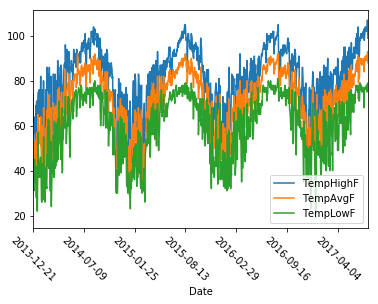

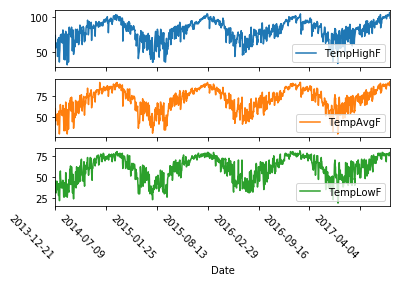

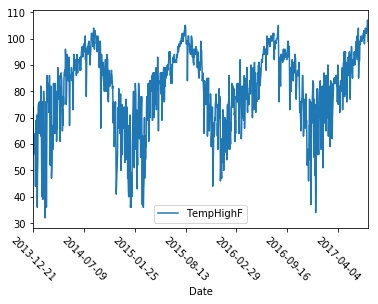

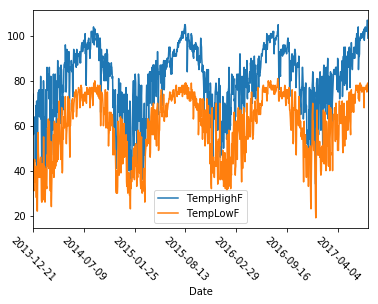

In [5]:
# Graficar todas las columnas
df.plot()
plt.xticks(rotation = -45)
plt.show()

# Usar subplot
df.plot(subplots=True)
plt.xticks(rotation = -45)
plt.show()

# Solo graficar una de las variables
col_list1 = ['TempHighF']
df[col_list1].plot()
plt.xticks(rotation = -45)
plt.show()

# Plot the Dew Point and Temperature data, but not the Pressure data
col_list2 = ['TempHighF','TempLowF']
df[col_list2].plot()
plt.xticks(rotation = -45)
plt.show()

### Acciones de Apple
En este caso importar se utilizará un parámetro importante de la función read_csv de pandas, el index_col y el parse dates. Se importa´ra de las dos forma para ver las diferencias.
Esto resulta importante, ya que al ser series de tiempo, al componente tiempo es muy relevante, y la utilizarla de index simplifica mucho el análisis y visualización.

         Date        Open        High         Low       Close   Adj Close  \
0  2014-09-29  100.589996  100.690002   98.040001   99.620003   93.514290   
1  2014-10-06   99.949997  102.379997   98.309998  100.730003   94.556244   
2  2014-10-13  101.330002  101.779999   95.180000   97.669998   91.683792   
3  2014-10-20   98.320000  105.489998   98.220001  105.220001   98.771042   
4  2014-10-27  104.849998  108.040001  104.699997  108.000000  101.380676   

      Volume  
0  142718700  
1  280258200  
2  358539800  
3  358532900  
4  220230600  


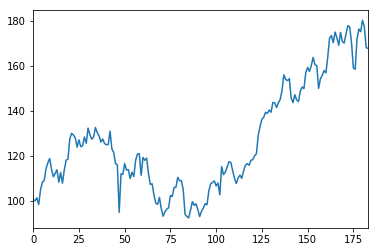

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-29  100.589996  100.690002   98.040001   99.620003   93.514290   
2014-10-06   99.949997  102.379997   98.309998  100.730003   94.556244   
2014-10-13  101.330002  101.779999   95.180000   97.669998   91.683792   
2014-10-20   98.320000  105.489998   98.220001  105.220001   98.771042   
2014-10-27  104.849998  108.040001  104.699997  108.000000  101.380676   

               Volume  
Date                   
2014-09-29  142718700  
2014-10-06  280258200  
2014-10-13  358539800  
2014-10-20  358532900  
2014-10-27  220230600  


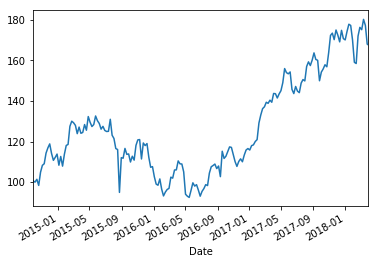

In [7]:
# Leer la data normalmente
aapl_1 = pd.read_csv("AAPL.csv")

# head
print(aapl_1.head())

# Al graficar "open" por ejemplo, el index no resulta de utilidad
aapl_1['Open'].plot()
plt.show()

# En cambio, tomando la data como 
aapl_2 = pd.read_csv("AAPL.csv", index_col = 'Date', parse_dates = True)

# head
print(aapl_2.head())

# Al graficar "open" por ejemplo, el index está incluido
aapl_2['Open'].plot()
plt.show()

Para lo enterior hay que tener claro el nombre que recibe el index, por lo que se recomienda leer en primera instancia con la función normal, y luego hacer los ajustes.

Además, para graficar una serie hay diferentes formas de hacerlo

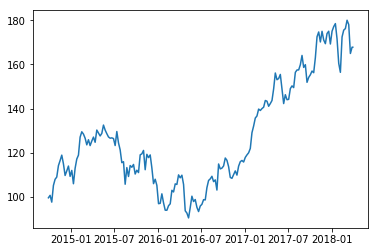

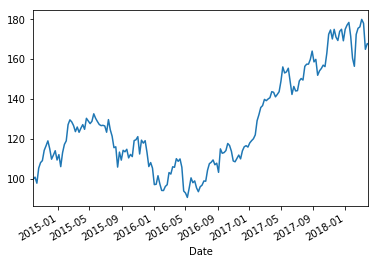

In [18]:
# Nos quedamos con aapl_2 para el estudio
aapl = pd.read_csv("AAPL.csv", index_col = 'Date', parse_dates = True)

# Crear la serie y graficar
close_series = aapl['Close']
plt.plot(close_series)
plt.show()

# Usar el método directamente
close_series.plot()
plt.show()

Al igual que como se obsvervó con la data del clima de Austin, es posible graficar todo en un mismo gráfico, donde se encuentra un problema de escala. El volumen es claramente mayor a los precios.
Una forma simple de arreglar el problema, en caso de que se quiera visualizar todo junto es escalar el eje y.

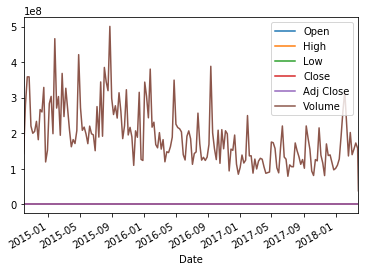

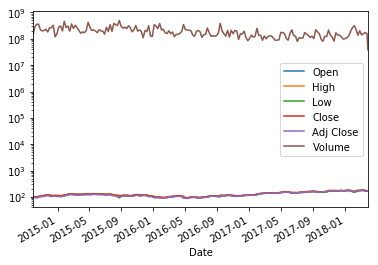

In [20]:
# Se grafica todo en un mismo gráfico
aapl.plot()
plt.show()

# Se vuelve a hacer el gráfico pero se escala el eje y
aapl.plot()
plt.yscale('log')
plt.show()

### Otros detalles de los gráficos
Es posible modificar los colores, leyendas, estilos de línea, y casi todo lo que a uno se le ocurra. Esto claramente va incrementando la complejidad del código, pero sirve para generar visualizaciones de calidad parapublicaciones.
Además veremos como guardar con plt.savefig('file_name.ext'), el cual generará un archivo del tipo especificado en la extensión.

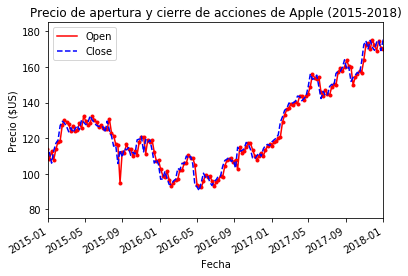

In [30]:
# Se especifica los detalles de cada una de las series a graficar
aapl['Open'].plot(color = 'r', style = '.-', legend = True)
aapl['Close'].plot(color = 'b', style = '--', legend = True)
plt.axis(('2015', '2018', 75, 185))
plt.title('Precio de apertura y cierre de acciones de Apple (2015-2018)')
plt.ylabel('Precio ($US)')
plt.xlabel('Fecha')

# Se usa el comando para guardar
plt.savefig('aapl.pdf')

# Se muestra en pantalla
plt.show()